In [1]:
from fastai.tabular import *
import pandas as pd
from matplotlib import pyplot as plt

## Helper

In [2]:
def missing_values_table(df):
        mis_val_table = pd.DataFrame({
            "Total missing values": df.isnull().sum(),
            "% of total values": 100*df.isnull().mean()
        })
        
        mis_val_table = mis_val_table[mis_val_table['Total missing values'] != 0]
        
        # Print some summary information
        print (f"Your selected dataframe has {df.shape[1]} columns.\n"
               f"There are {mis_val_table.shape[0]} columns that have missing values.")
        
        # Return sorted dataframe with missing information and rounded values
        return mis_val_table[mis_val_table['Total missing values'] != 0].sort_values(by='Total missing values', ascending=False).round(1)

## load

In [3]:
!pwd

/media/michael/WDC Black/Documents/PythonProjects/houseprice


In [4]:
!ls

houseprice.ipynb


In [5]:
#path = Path('/media/michael/WDC Black/Documents/PythonProjects/data/houseprice')  # Windows
path = f'/media/michael/WDC Black/Documents/PythonProjects/data/houseprice'

In [17]:
#!ls {path}
!ls '/media/michael/WDC Black/Documents/PythonProjects/data/houseprice'

data_description.txt  sample_submission.csv  train.csv
models		      test.csv		     train_tiny.csv


In [20]:
df = pd.read_csv(f'{path}/train.csv', sep=',')
df.drop('Id', axis=1, inplace=True)
df_test = pd.read_csv(f'{path}/test.csv', sep=',')
df_test.drop('Id', axis=1, inplace=True)

In [21]:
df.shape, df_test.shape

((1460, 80), (1459, 79))

In [8]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##  eda

In [165]:
df.Alley.describe()

count       91
unique       2
top       Grvl
freq        50
Name: Alley, dtype: object

In [69]:
df.MiscVal.describe()

count     1460.000000
mean        43.489041
std        496.123024
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      15500.000000
Name: MiscVal, dtype: float64

In [59]:
# plt.plot(df.Alley.astype(int))

In [64]:
df.isna().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [68]:
missing_values_table(df)

Your selected dataframe has 81 columns.
There are 19 columns that have missing values.


,Total missing values,% of total values
PoolQC,1453,99.5
MiscFeature,1406,96.3
Alley,1369,93.8
Fence,1179,80.8
FireplaceQu,690,47.3
LotFrontage,259,17.7
GarageType,81,5.5
GarageYrBlt,81,5.5
GarageFinish,81,5.5
GarageQual,81,5.5


##  model

In [9]:
from fastai.utils.mem import *

In [10]:
gpu_with_max_free_mem()

(0, 6924)

In [11]:
procs = [FillMissing, Categorify, Normalize]

In [25]:
train_idx = range(len(df)-len(df)//5)
valid_idx = range(len(df)-len(df)//5, len(df))
len(train_idx), len(valid_idx), len(train_idx)+len(valid_idx)

(1168, 292, 1460)

In [13]:
dep_var = 'SalePrice'

In [14]:
cat_names = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
             'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
             'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
             'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
             'Heating',
             'HeatingQC', 'CentralAir', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
             'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces',
             'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
             'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']

deprecated?

In [15]:
# data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx,
#                                procs=procs, cat_names=cat_names)

In [22]:
doc(TabularList)

In [26]:
test = TabularList.from_df(df_test, path=path, cat_names=cat_names)

In [34]:
data = (TabularList.from_df(df, path=path, cat_names=cat_names,
                            procs=procs)
                            .split_by_idxs(train_idx, valid_idx)
                            .label_from_df(cols=dep_var, label_cls=FloatList)
                            .add_test(test)
                            .databunch())

In [35]:
data.show_batch(rows=10)

MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition,target
160,FV,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,6,5,Gable,CompShg,MetalSd,MetalSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,3,1,Gd,5,Typ,1,TA,Detchd,2000.0,Unf,2,TA,TA,Y,#na#,#na#,#na#,6,2007,WD,Normal,177000.0
120,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Blmngtn,Norm,Norm,TwnhsE,1Story,7,5,Gable,CompShg,WdShing,Wd Shng,BrkFace,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2007.0,Fin,3,TA,TA,Y,#na#,#na#,#na#,6,2007,New,Partial,172500.0
20,RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,Gable,CompShg,VinylSd,VinylSd,Stone,Gd,TA,PConc,Ex,TA,Av,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2006.0,RFn,3,TA,TA,Y,#na#,#na#,#na#,7,2009,WD,Normal,255500.0
20,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,6,6,Gable,CompShg,Plywood,Plywood,None,TA,TA,CBlock,TA,TA,No,ALQ,LwQ,GasA,TA,Y,SBrkr,0,1,2,0,3,1,TA,6,Typ,2,Fa,Detchd,1980.0,Unf,2,TA,TA,Y,#na#,MnPrv,#na#,2,2008,WD,Normal,171500.0
60,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,2Story,6,6,Gable,CompShg,HdBoard,HdBoard,BrkFace,TA,TA,CBlock,Gd,TA,No,Unf,Unf,GasA,TA,Y,SBrkr,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1980.0,Unf,2,TA,TA,Y,#na#,MnPrv,#na#,4,2010,WD,Normal,171000.0
20,RL,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,Gable,CompShg,Wd Sdng,Wd Sdng,BrkFace,TA,TA,CBlock,Gd,TA,No,LwQ,Unf,GasA,Gd,Y,FuseA,1,0,1,0,2,1,TA,6,Typ,1,Gd,Attchd,1956.0,RFn,1,TA,TA,Y,#na#,#na#,#na#,5,2008,WD,Normal,139000.0
70,RL,Pave,#na#,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,1Fam,2Story,6,8,Gambrel,CompShg,Wd Sdng,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,ALQ,LwQ,GasA,Ex,Y,SBrkr,1,0,2,1,3,1,Gd,9,Typ,1,TA,Detchd,1945.0,Unf,1,TA,TA,Y,#na#,MnPrv,#na#,7,2007,WD,Normal,259500.0
60,FV,Pave,#na#,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,None,Gd,TA,PConc,Gd,TA,No,Unf,Unf,GasA,Ex,Y,SBrkr,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2003.0,Fin,2,TA,TA,Y,#na#,#na#,#na#,11,2009,WD,Normal,263000.0
20,RL,Pave,#na#,Reg,Bnk,AllPub,Corner,Mod,Sawyer,Norm,Norm,1Fam,1Story,5,6,Gable,CompShg,CemntBd,Wd Sdng,None,TA,TA,CBlock,TA,TA,No,Rec,Unf,GasA,Gd,Y,SBrkr,1,0,1,1,3,1,TA,6,Min2,1,TA,Detchd,1999.0,Unf,2,TA,TA,Y,#na#,#na#,#na#,11,2006,WD,Normal,168000.0
20,RL,Pave,#na#,IR1,Low,AllPub,CulDSac,Mod,ClearCr,Norm,Norm,1Fam,1Story,4,6,Flat,Tar&Grv,Plywood,Plywood,None,TA,TA,CBlock,Gd,TA,Gd,BLQ,Unf,GasA,Ex,Y,SBrkr,1,0,1,0,2,1,Gd,6,Min1,2,Gd,Attchd,1954.0,Fin,2,TA,TA,Y,#na#,#na#,#na#,3,2008,WD,Normal,256000.0


In [42]:
learn = tabular_learner(data, layers=[200,100], metrics=mean_squared_error)

In [43]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


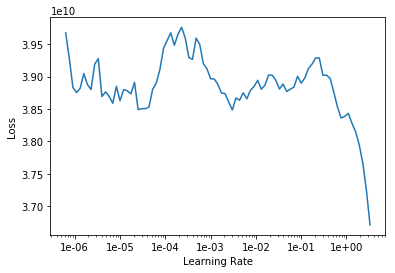

In [44]:
learn.recorder.plot()

In [45]:
learn.fit_one_cycle(1, 1e-5)

epoch,train_loss,valid_loss,mean_squared_error,time
0,38912671744.000000,39918555136.000000,39918555136.000000,00:00
